$\Huge Code$ $\hspace{0.1cm}$ $\Huge to$ $\hspace{0.1cm}$ $\Huge do$ $\hspace{0.1cm}$ $\Huge maps$ $\hspace{0.1cm}$ $\Huge cutouts$ $\Huge :$ 

# Modules : 

In [1]:
%matplotlib inline
import healpy as hp
import matplotlib.pyplot as plt 
from matplotlib import rc
rc('text', usetex=True)
from astropy.io import fits
import numpy as np
from astropy import constants as cst
from astropy.cosmology import FlatLambdaCDM
import pysm as pysm
import ccatp_sky_model as sky

In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.7255)
T_CMB = cosmo.Tcmb0.si.value
k_B = cst.k_B.value
h = cst.h.value
c = cst.c.value

In [3]:
data_path = "/vol/arc3/data1/sz/CCATp_sky_model/templates/"

# Function : 

In [4]:
def project_maps(allsky_map, RA, DEC, map_size = 10, pixel_size = 0.4):

	'''Creates gnomic projections of HEALPix all-sky maps.
	Parameters
	----------
	allsky_map: float array
		numpy array containing a healpy all-sky map with a valid nside
	RA: float or float array array, optional
		Right acention of objects, fk5 coordinates are required.
	DEC: float or float array, optional
		Declination of objects, fk5 coordinates are required.
	map_size: float, optional
		Size of the desired projected map in degree, map will be square. Default: 10
	pixel_size: float, optional
		Pixel size of the desired projected map in arcmin. Default: 0.4
	Returns
	-------
	maps: float array
		Array containing the projected maps
	'''

	RA = np.asarray(RA)
	DEC = np.asarray(DEC)

	n = len(RA)
	npix = int(map_size*60 / pixel_size)

	maps = np.zeros((n, npix, npix), dtype=np.float32)

	for i in np.arange(n):
			maps[i,:,:] = hp.visufunc.gnomview(allsky_map, coord = ['G', 'C'], rot=[RA[i],DEC[i]], reso = pixel_size, xsize = npix, return_projected_map = True, no_plot=True) 

	return(maps)

# Launch : 

## Example map : CMB

In [5]:
CMB_path = 'CMB/CMB_unlensed_CITA_mK.fits'

In [6]:
CMB = hp.read_map(data_path + CMB_path, dtype = np.float32)

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


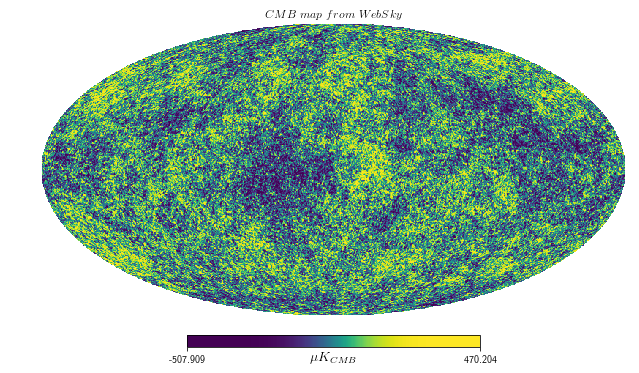

In [7]:
hp.mollview(CMB, title="$CMB$ $map$ $from$ $WebSky$", norm='hist',unit='$\mu K_{CMB}$')

## Applying the function 

In [8]:
Cutout = project_maps(allsky_map=CMB, RA=[123], DEC=[-81], map_size = 10, pixel_size = 0.4)

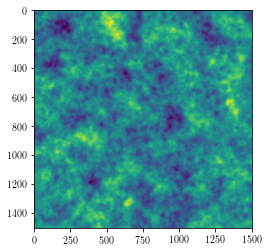

In [12]:
plt.imshow(Cutout[0])